In [154]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

## Road accidents data from 2009-2012

In [199]:
data=pd.read_csv("./road accidents/4yrs.csv",encoding='cp1252')
data


,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,1,1/1/2009,12:55:00 AM,Unclassified,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,44,Car
1,1,1/2/2009,11:35:00 PM,Unclassified,Dry,Darkness: street lights present and lit,Fine without high winds,Driver,Serious,Female,23,Car
2,1,1/2/2009,4:45:00 PM,Unclassified,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Female,12,Car
3,1,1/2/2009,5:23:00 PM,A,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,15,Car
4,2,1/2/2009,1:50:00 PM,Unclassified,Dry,Daylight: street lights present,Fine without high winds,Driver,Slight,Female,34,Car
...,...,...,...,...,...,...,...,...,...,...,...,...
11251,3,12/31/2012,3:05:00 PM,A,Dry,Daylight: street lights present,Fine without high winds,Passenger,Slight,Male,42,Car
11252,1,12/31/2012,4:15:00 PM,A,Wet / Damp,Daylight: street lights present,Fine without high winds,Passenger,Slight,Female,81,Bus or coach (17 or more passenger seats)
11253,1,12/31/2012,5:13:00 PM,Unclassified,Wet / Damp,Darkness: street lighting unknown,Fine without high winds,Pedestrian,Slight,Male,33,Car
11254,1,12/31/2012,7:40:00 PM,Unclassified,Wet / Damp,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,13,Car


### 1. clean data
##### drop the Nan values and 
##### droped one column the time column.

In [200]:
nandf=data[data.isna().any(axis=1)]
data=data.dropna(how='all')
data=data.drop(columns=['Time (24hr)'])
data

,Number of Vehicles,Accident Date,1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,1,1/1/2009,Unclassified,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,44,Car
1,1,1/2/2009,Unclassified,Dry,Darkness: street lights present and lit,Fine without high winds,Driver,Serious,Female,23,Car
2,1,1/2/2009,Unclassified,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Female,12,Car
3,1,1/2/2009,A,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,15,Car
4,2,1/2/2009,Unclassified,Dry,Daylight: street lights present,Fine without high winds,Driver,Slight,Female,34,Car
...,...,...,...,...,...,...,...,...,...,...,...
11251,3,12/31/2012,A,Dry,Daylight: street lights present,Fine without high winds,Passenger,Slight,Male,42,Car
11252,1,12/31/2012,A,Wet / Damp,Daylight: street lights present,Fine without high winds,Passenger,Slight,Female,81,Bus or coach (17 or more passenger seats)
11253,1,12/31/2012,Unclassified,Wet / Damp,Darkness: street lighting unknown,Fine without high winds,Pedestrian,Slight,Male,33,Car
11254,1,12/31/2012,Unclassified,Wet / Damp,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,13,Car


### 2. Add a month and year column

In [201]:
data['Accident Date']=pd.to_datetime(data['Accident Date'])
data['year'] = pd.DatetimeIndex(data['Accident Date']).year
data['month'] = pd.DatetimeIndex(data['Accident Date']).month
data=data.drop(columns=['Accident Date'])
data

,Number of Vehicles,1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle,year,month
0,1,Unclassified,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,44,Car,2009,1
1,1,Unclassified,Dry,Darkness: street lights present and lit,Fine without high winds,Driver,Serious,Female,23,Car,2009,1
2,1,Unclassified,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Female,12,Car,2009,1
3,1,A,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,15,Car,2009,1
4,2,Unclassified,Dry,Daylight: street lights present,Fine without high winds,Driver,Slight,Female,34,Car,2009,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11251,3,A,Dry,Daylight: street lights present,Fine without high winds,Passenger,Slight,Male,42,Car,2012,12
11252,1,A,Wet / Damp,Daylight: street lights present,Fine without high winds,Passenger,Slight,Female,81,Bus or coach (17 or more passenger seats),2012,12
11253,1,Unclassified,Wet / Damp,Darkness: street lighting unknown,Fine without high winds,Pedestrian,Slight,Male,33,Car,2012,12
11254,1,Unclassified,Wet / Damp,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,13,Car,2012,12


In [232]:
data.tail()

,Number of Vehicles,1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle,year,month
11251,3,A,Dry,Daylight: street lights present,Fine without high winds,Passenger,Slight,Male,42,Car,2012,12
11252,1,A,Wet / Damp,Daylight: street lights present,Fine without high winds,Passenger,Slight,Female,81,Bus or coach (17 or more passenger seats),2012,12
11253,1,Unclassified,Wet / Damp,Darkness: street lighting unknown,Fine without high winds,Pedestrian,Slight,Male,33,Car,2012,12
11254,1,Unclassified,Wet / Damp,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,13,Car,2012,12
11255,2,Unclassified,Dry,Darkness: street lighting unknown,Fine without high winds,Driver,Slight,Male,32,Car,2012,12


### Q.1 What road class do most accidents happen

## Q2. In what lighting conditions do most accidents occur


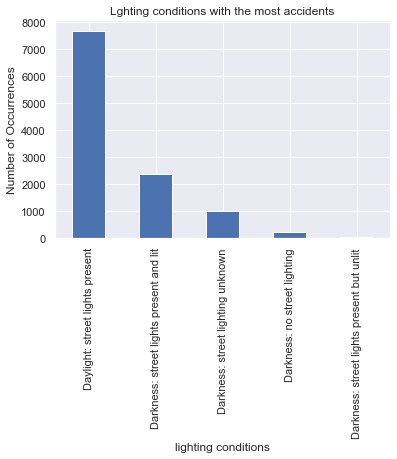

In [203]:

#data.Lighting Conditions.value_counts().plot(kind='bar')

light  = data['Lighting Conditions'].value_counts().plot(kind='bar',
                                                        title='Lghting conditions with the most accidents',
                                                        ylabel='Number of Occurrences',
                                                        xlabel='lighting conditions')


plt.show()

### Q2b. plotting a graph to comapare it over years.

Text(0.5, 1.0, 'Lighting conditions over the years')

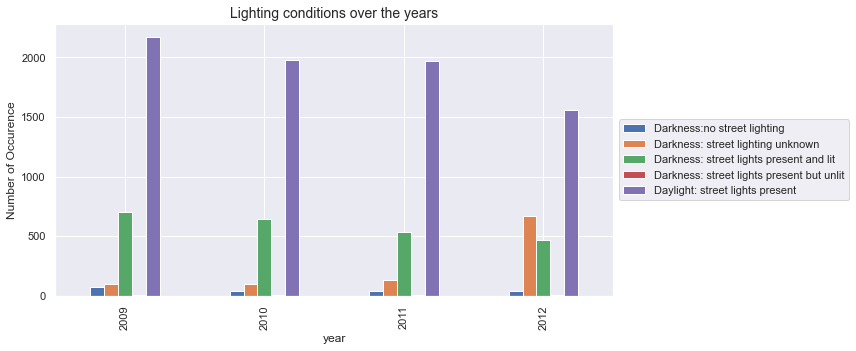

In [235]:
l=data.groupby(['year']).agg({'Lighting Conditions': "value_counts"}).unstack(fill_value=0).plot(kind='bar',figsize=(10,5))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(['Darkness:no street lighting', 'Darkness: street lighting unknown', 'Darkness: street lights present and lit',
            'Darkness: street lights present but unlit','Daylight: street lights present'],
           loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Number of Occurence')
plt.title('Lighting conditions over the years',fontsize=14)